In [1]:
!cd ../src

zsh:cd:1: no such file or directory: ../src


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [6]:
nlp = spacy.load("en_core_web_lg")

### Parameters


In [7]:
# Experiment
group = "free"

colors = {
    "controlled": "#97121f",
    "free": "#1271d1",
    "combined": "#0b4539"
}

### Absolute word frequencies
Without punctuation and stopwords.
Lemmatized.

In [10]:
from collections import Counter
from src.data import get_descriptions
from src.utils import plots_dir

descriptions = get_descriptions(group)

for pattern in descriptions:
    for description in pattern:
        doc = nlp(str(description))

        # Remove punctuation, stop words and lemmatize
        lemmas = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" or token.pos_ == "ADJ"]

        new_desc = " ".join(lemmas)
        print(new_desc)


more beat more beat strong one present thing sound club finger speaker more vibration sound surface music pleasant feeling festive
little bit onomatopoeia finger lot sound movie cartoon onomatopoeia step time cartoon walking one happy cartoon walking fun cartoon walking nice relaxed person cartoon cartoon one clock one fat clock belly fast fast character time step funny
rough sensation hectic warning signal cell phone sensation wrong warning rough sensation experience finger strobe light club feeling more rhythmic light show
tiny electrocution finger energetic ready electrical fence tiny tiny bit finger friction small pulse
glass bit flat surface friction hard heavy heavy more bump day productive day feeling weekend today evening stuff hard
bump whole surface finger little sticki smooth textured little bit finger little bit little bit stuck piece glass glass sticky sticky way object hand hand
one resistance proper word little bit more resistance funny graph less peak stable object like

### Absolute word frequencies
Without punctuation and stopwords.
Lemmatized.
Only nouns and adjectives.

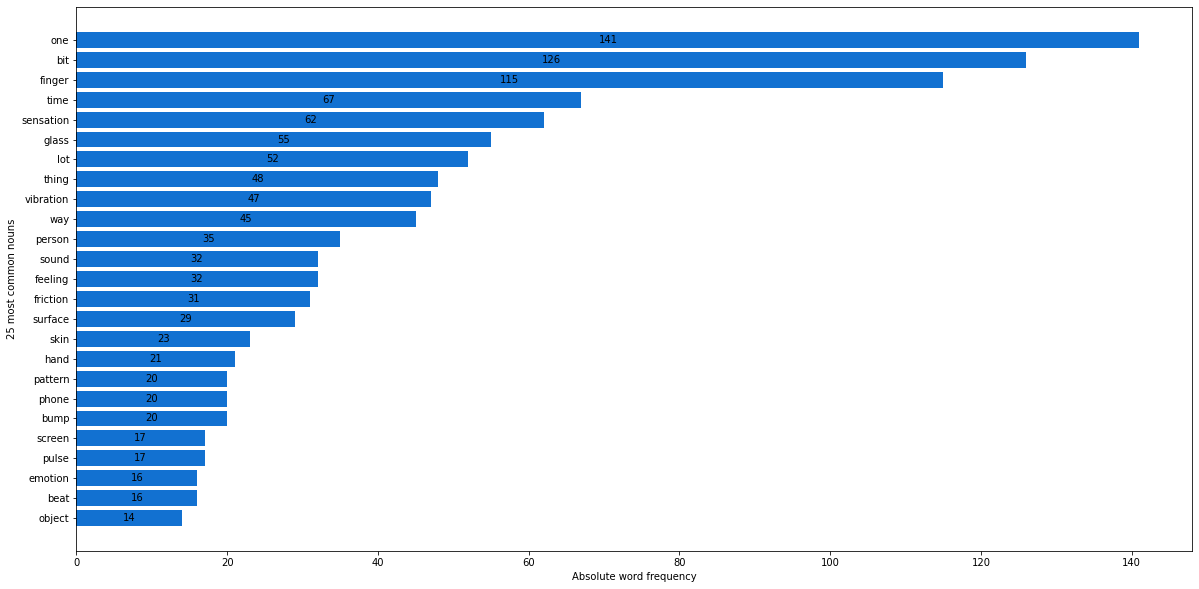

In [145]:
from collections import Counter
from src.data import get_full_text
from src.utils import plots_dir

text = get_full_text(group)

doc = nlp(text)

nouns = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN"]
nouns = [noun for noun in nouns if noun != "onomatopoeia"]

most_common_nouns = Counter(nouns).most_common(25)

y = np.arange(len(most_common_nouns))
x = [v for k, v in most_common_nouns]
labels = [k for k, v in most_common_nouns]

fig, ax = plt.subplots(figsize=(20,10))
container = ax.barh(y, x, align="center", color=colors[group])
ax.set_yticks(y, labels=labels)
ax.set_xlabel("Absolute word frequency")
ax.set_ylabel("25 most common nouns")
ax.bar_label(container, label_type='center')
ax.invert_yaxis()
plt.savefig(plots_dir() / f"{group}_1_absolute_word_frequencies_nouns.png",
            bbox_inches='tight',
            transparent=True,
            pad_inches=0,
            dpi=300)

### Absolute descriptor frequencies

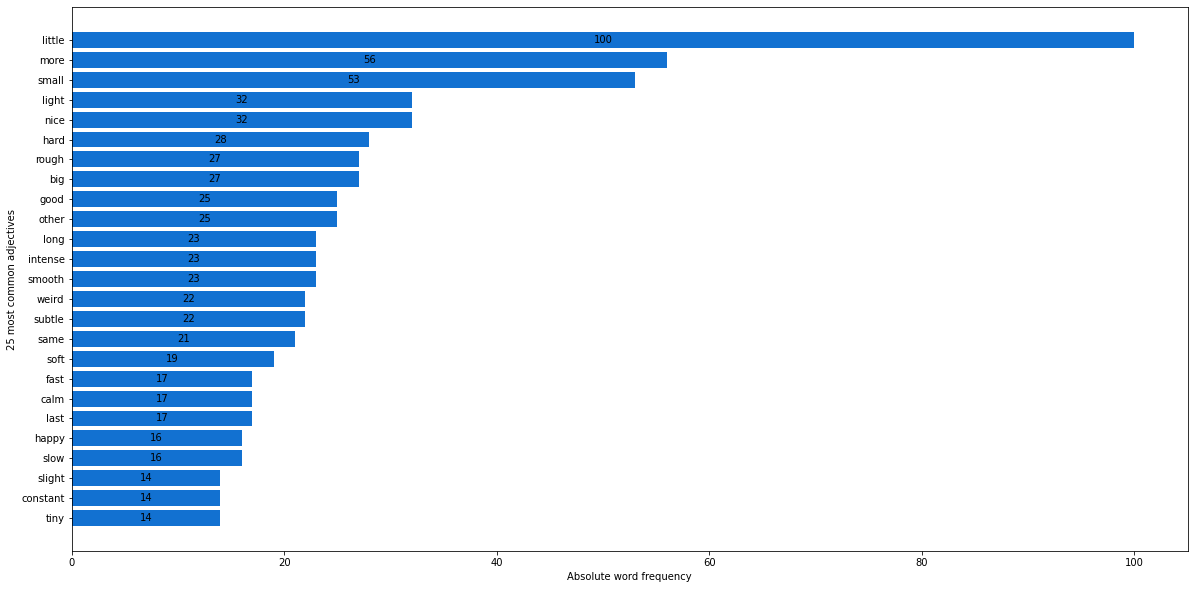

In [146]:
from collections import Counter
from src.data import get_merged_norm_descriptions
from src.utils import plots_dir

text = get_merged_norm_descriptions(group)

doc = nlp(text)

adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ"]

most_common_adjectives = Counter(adjectives).most_common(25)

y = np.arange(len(most_common_adjectives))
x = [v for k, v in most_common_adjectives]
labels = [k for k, v in most_common_adjectives]

fig, ax = plt.subplots(figsize=(20,10))
container = ax.barh(y, x, align="center", color=colors[group])
ax.set_yticks(y, labels=labels)
ax.set_xlabel("Absolute word frequency")
ax.set_ylabel("25 most common adjectives")
ax.bar_label(container, label_type='center')
ax.invert_yaxis()
plt.savefig(plots_dir() / f"{group}_1_absolute_word_frequencies_adjectives.png",
            bbox_inches='tight',
            transparent=True,
            pad_inches=0,
            dpi=300)